In [1]:
import cv2

In [2]:
sarang = cv2.imread('./image/parrot_sarang.jpg', cv2.IMREAD_COLOR)

In [3]:
import matplotlib.pyplot as plt

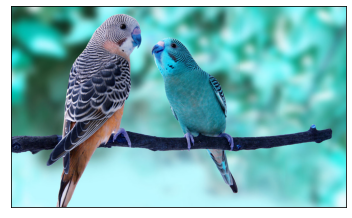

In [4]:
plt.xticks([])    # 눈금 삭제
plt.yticks([])

plt.imshow(sarang)

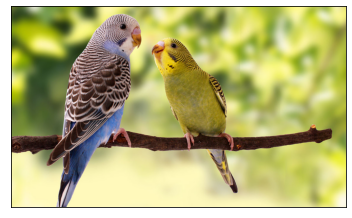

In [5]:
# cv2.COLOR_RGB2BGR : RGB ->GBR
sarang = cv2.cvtColor(sarang, cv2.COLOR_RGB2BGR)

plt.xticks([])
plt.yticks([])

plt.imshow(sarang)

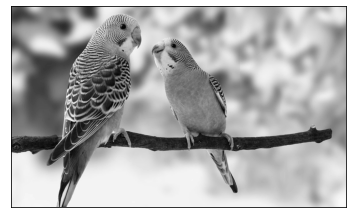

In [6]:
sarang_gray = cv2.imread('./image/parrot_sarang.jpg', cv2.IMREAD_GRAYSCALE)

plt.xticks([])
plt.yticks([])

# cmap="gray" : 출력모드를 흑백으로 설정
plt.imshow(sarang_gray, cmap="gray")

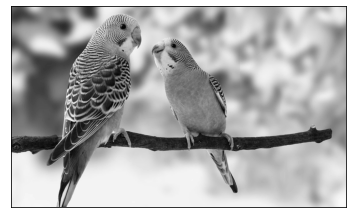

In [7]:
sarang = cv2.imread('./image/parrot_sarang.jpg', cv2.IMREAD_COLOR)

# BGR2GRAY : RGB -> BGR -> Gray
sarang_gray = cv2.cvtColor(sarang, cv2.COLOR_BGR2GRAY)    # python에서는 BGR를 사용하기 때문에 BGR2GRAY로 해야 함

plt.xticks([])
plt.yticks([])

plt.imshow(sarang_gray, cmap="gray")

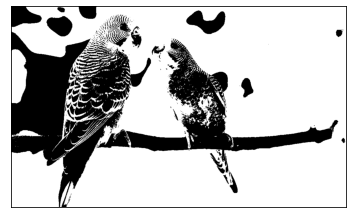

In [8]:
# threshold() : 흑백이미지를 이진 이미지로 변환하는 함수
# threshold(변환할 이미지, 기준값,, 기준값에 따른 결과값, 변환방법)
# 만약 픽셀값이 128보다 크면 255로 값을 변경(cv2.THRESH_BINARY)
# 만약 픽셀값이 128보다 작으면 0으로 값을 변경
# _  : threshold()는 리턴값이 2개 있는데 첫번째 리턴값을 안받겠다는 의미

_, sarang_bin = cv2.threshold(sarang_gray, 128, 255, cv2.THRESH_BINARY)

plt.xticks([])
plt.yticks([])

plt.imshow(sarang_bin, cmap="gray")

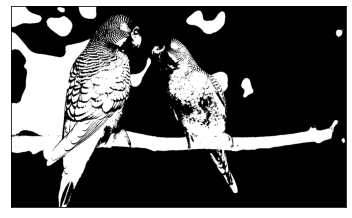

In [9]:
_, sarang_bin = cv2.threshold(sarang_gray, 128, 255, cv2.THRESH_BINARY_INV)

plt.xticks([])
plt.yticks([])

plt.imshow(sarang_bin, cmap="gray")

### 동영상 파일을 가져오거나 카메라를 연동하기

In [24]:
import cv2

# VideoCapture() : 비디오 파일이나 카메라를 연동
cap = cv2.VideoCapture("./image/fish.mp4")
# 카메라를 사용하는 경우 (다른 프로그램에서 (zoom 등) 카메라를 사용하는 중이라면 연동되지 않음)
# cap = cv2.VideoCapture(0)

연동한 카메라나 동영상으로부터 이미지를 읽어서 출력
* 초당 30장의 이미지 출력

In [23]:
while True:
    # 비디오에서 이미지를 한장씩 가져온다
    # ret : 이미지를 잘 읽었으면 True를 반환
    # frame : 읽은 이미지가 저장
    ret, frame = cap.read()
    
    # 이미지를 읽지 못했거나 영상이 모두 실행된 경우 발생하는 오류에 따른 예외처리
    if not ret:   # 이미지를 읽지 못하면
        print("비디오 읽기 실패")
        cap.release()   #비디오 중지
        cv2.destroyAllWindows()    # 띄운 새창을 모두 닫아준다
        break    # while 반복문 중지
        
    # 읽은 이미지를 출력 (새창을 띄워서 출력)
    cv2.imshow('fish', frame)
    
    # 초당 30장의 이미지 출력되도록 함
    # 이미지 한장을 출력하고 33/1000초 동안 키입력을 대기
    key = cv2.waitKey(33)
    
    # 무한루프를 멈춰주는 기능
    if key == 49: # 숫자 1키를 의미(아스키코드)
        cap.release()  # 비디오 중지
        cv2.destroyAllWindows()  
        break

### 영상 녹화 기능 구현(CCTV 구현)

In [25]:
# 녹화 기능 설정 (속도 화면크기 코덱)
# 속도 (초당 몇 장의 이미지를 출력하게 할 것인지 결정)
fps = 30.0

#화면 크기
width = int(cap.get(3))   #원 영상의 가로 크기를 실수로 가져온다
height = int(cap.get(4))

# 코덱 설정
codec = cv2.VideoWriter_fourcc(*"DIVX")   # avi 파일코덱

# 녹화 파일 설정(파일명, 코덱, 속도,  화면크기)
out = cv2.VideoWriter("./image/cctv.avi", codec, fps, (width, height))

In [26]:
record = False   # 시작 시에는 녹화가 되지 않도록 설정

while True:
    ret, frame = cap.read()
    
    if not ret:
        cap.release()
        cv2.destroyAllWindows()
        break
        
    cv2.imshow("cctv", frame)
    
    if record:
        # 현재 이미지를 녹화 파일에 쓴다
        out.write(frame)
        
    key = cv2.waitKey(33)
    
    if key == 49:
        print('녹화를 종료합니다')
        cap.release()
        cv2.destroyAllWindows()
        break
        
    if key == 50: # 숫자2키를 누르면
        record = True    # 녹화가 가능하도록 설정

녹화를 종료합니다
